In [1]:
!pip install envs
!pip install python-dotenv
!pip install psycopg2-binary
from utils.Metadata import Metadata
from utils.Database import Database

import pandas as pd
import matplotlib.pyplot as plt
import math 
plt.style.use('ggplot')

In [2]:
meta = Metadata()
db = Database()

dfOpt = meta.dfOptimos()

In [3]:
dfEjec = meta.dfEjecuciones(db.getEjecuciones())
dfEjec = dfEjec.merge(dfOpt,how='left',on='instance').set_index(['id_ejec'])
dfRes = meta.dfResultados(db.getEjecucionesResultados())

In [4]:
tabla = dfEjec.reset_index().merge(dfRes,how='left',on='id_ejec')

In [5]:
jerarquia = ['GWO_SCP_BCL1_CPU_C','GWO_SCP_QL1_CPU_C','ANTHHGWO_SCP_FERO_CPU_C','ANTHHGWO_SCP_QL1_CPU_C']
tabla["algorithm"] = pd.Categorical(tabla["algorithm"],jerarquia)

In [17]:
pivote = dfEjec.reset_index().groupby(['algorithm','instance','status'])['id_ejec'].count().\
                                                        to_frame().\
                                                        reset_index().\
pivot(index=['algorithm','instance'],columns='status',values='id_ejec')
pivote

status                            ejecutando  pendiente  terminado
algorithm               instance                                  
ANTHHGWO_SCP_FERO_CPU_C mscp41          10.0       19.0        2.0
                        mscp51          10.0       19.0        2.0
                        mscp61           5.0       19.0        7.0
                        mscpa1          12.0       19.0        NaN
                        mscpb1           6.0       19.0        6.0
                        mscpc1          12.0       19.0        NaN
                        mscpd1          11.0       19.0        1.0
ANTHHGWO_SCP_QL1_CPU_C  mscp41           8.0       19.0        4.0
                        mscp51           6.0       19.0        6.0
                        mscp61           5.0       19.0        7.0
                        mscpa1          11.0       19.0        1.0
                        mscpb1           5.0       19.0        7.0
                        mscpc1          12.0       19.0        NaN
                        mscpd1           6.0       19.0        6.0
GWO_SCP_BCL1_CPU_C      mscp41          13.0       18.0        NaN
                        mscp51          12.0       19.0        NaN
                        mscp61           6.0       19.0        6.0
                        mscpa1          12.0       19.0        NaN
                        mscpb1          10.0       19.0        2.0
                        mscpc1          12.0       19.0        NaN
                        mscpd1          12.0       19.0        NaN
GWO_SCP_QL1_CPU_C       mscp41           9.0       19.0        3.0
                        mscp51           6.0       19.0        6.0
                        mscp61           4.0       19.0        8.0
                        mscpa1          11.0       19.0        1.0
                        mscpb1           5.0       19.0        7.0
                        mscpc1          12.0       19.0        NaN
                        mscpd1           6.0       19.0        6.0

In [30]:
print(f'EJECUTANDO {pivote["ejecutando"].sum()} PENDIENTE {pivote["pendiente"].sum()} TERMINADO {pivote["terminado"].sum()}')

EJECUTANDO 249.0 PENDIENTE 531.0 TERMINADO 88.0


In [9]:
tabla.query("status in ('terminado')").reset_index().groupby(['algorithm','instance']).agg({'optimo':['min'],'fitness':['max','min','mean','median'],'id_ejec':['count']})

optimo fitness                            \
                                    min     max    min        mean median   
algorithm               instance                                            
GWO_SCP_BCL1_CPU_C      mscp41      NaN     NaN    NaN         NaN    NaN   
                        mscp51      NaN     NaN    NaN         NaN    NaN   
                        mscp61    138.0   145.0  141.0  142.666667  142.5   
                        mscpa1      NaN     NaN    NaN         NaN    NaN   
                        mscpb1     69.0    71.0   70.0   70.500000   70.5   
                        mscpd1      NaN     NaN    NaN         NaN    NaN   
GWO_SCP_QL1_CPU_C       mscp41    429.0   434.0  430.0  432.000000  432.0   
                        mscp51    253.0   270.0  258.0  262.166667  260.0   
                        mscp61    138.0   146.0  140.0  142.875000  143.0   
                        mscpa1    253.0   264.0  264.0  264.000000  264.0   
                        mscpb1     69.0    71.0   69.0   70.285714   71.0   
                        mscpd1     60.0    65.0   61.0   62.500000   62.5   
ANTHHGWO_SCP_FERO_CPU_C mscp41    429.0     NaN    NaN         NaN    NaN   
                        mscp51    253.0     NaN    NaN         NaN    NaN   
                        mscp61    138.0   143.0  141.0  142.333333  143.0   
                        mscpa1      NaN     NaN    NaN         NaN    NaN   
                        mscpb1     69.0    70.0   69.0   69.333333   69.0   
                        mscpd1     60.0    61.0   61.0   61.000000   61.0   
ANTHHGWO_SCP_QL1_CPU_C  mscp41    429.0   433.0  433.0  433.000000  433.0   
                        mscp51    253.0   261.0  257.0  258.600000  258.0   
                        mscp61    138.0   142.0  140.0  141.000000  141.0   
                        mscpa1    253.0     NaN    NaN         NaN    NaN   
                        mscpb1     69.0    69.0   69.0   69.000000   69.0   
                        mscpd1     60.0    62.0   60.0   61.000000   61.0   

                                 id_ejec  
                                   count  
algorithm               instance          
GWO_SCP_BCL1_CPU_C      mscp41         0  
                        mscp51         0  
                        mscp61         6  
                        mscpa1         0  
                        mscpb1         2  
                        mscpd1         0  
GWO_SCP_QL1_CPU_C       mscp41         3  
                        mscp51         6  
                        mscp61         8  
                        mscpa1         1  
                        mscpb1         7  
                        mscpd1         6  
ANTHHGWO_SCP_FERO_CPU_C mscp41         2  
                        mscp51         2  
                        mscp61         7  
                        mscpa1         0  
                        mscpb1         6  
                        mscpd1         1  
ANTHHGWO_SCP_QL1_CPU_C  mscp41         4  
                        mscp51         6  
                        mscp61         7  
                        mscpa1         1  
                        mscpb1         7  
                        mscpd1         6

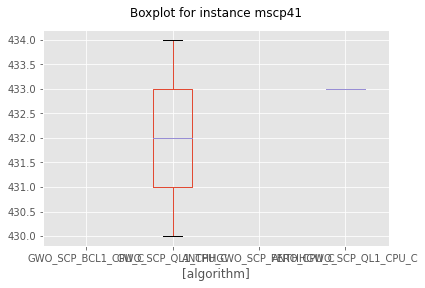

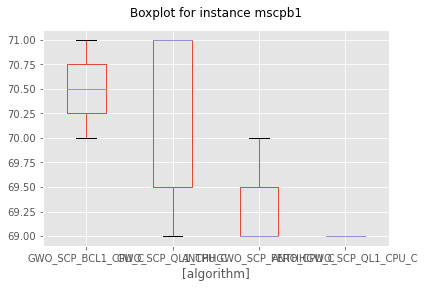

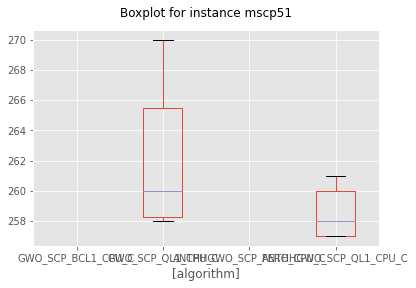

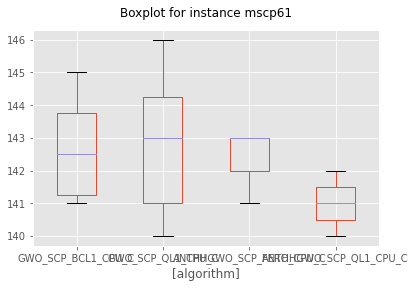

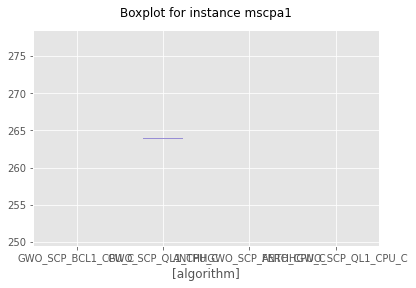

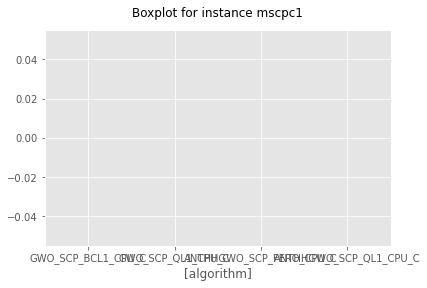

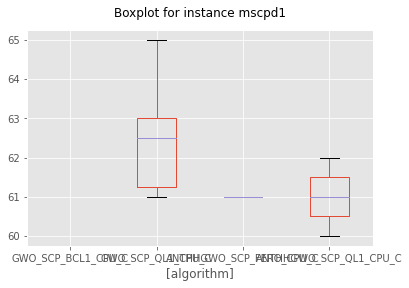

In [8]:
for instance in tabla.instance.unique():
    data = tabla.query("instance == @instance")[['algorithm','fitness']]
    data.boxplot(by=['algorithm'],column='fitness')
    plt.suptitle(f'Boxplot for instance {instance}')
    plt.title('')
    plt.show()